In [3]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

## Setup input data

In [1]:
input_data = 'diffr_100x100_50k_unifrom.h5'

In [4]:
with h5py.File(input_data,'r') as fh:
    print (fh['data'])

<HDF5 group "/data" (50000 members)>


In [24]:
# H5Glance(input_data)

## Convert one frame to check

### Original

<HDF5 dataset "diffr": shape (1, 100, 100), type "<f8">
127.69046002803049 28376.57803766932 0.0001379883748398002
<HDF5 dataset "diffr": shape (1, 100, 100), type "<f8">
126.52051880260865 28378.76659206229 6.542298619266998e-05


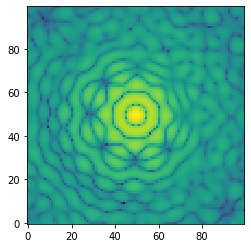

In [9]:
with h5py.File(input_data,'r') as fh:
    for i,frame in enumerate(fh['data']) :
        if (i > 1):
            break
        diffr = fh['data/'+frame+'/diffr'][0]
        print (fh['data/'+frame+'/diffr'])
        plt.imshow(diffr,norm=colors.LogNorm(vmin=diffr.min(), vmax=diffr.max()),origin='lower')
        print (diffr.mean(),diffr.max(),diffr.min())

### Set multiplication

In [6]:
multiplication = 1

### After multiplication

125.9733 28378 0


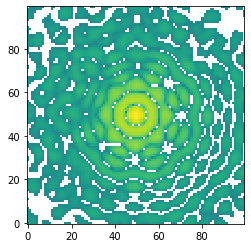

In [7]:
with h5py.File(input_data,'r') as fh:
    new_diffr = fh['data/'+frame+'/diffr'][0]*multiplication
with h5py.File('tmp.h5','w') as f:
    f.create_dataset("diffr", data=new_diffr,dtype='i8')    
with h5py.File('tmp.h5','r') as fh:
    tmp_diffr = fh['diffr'][...]
    plt.imshow(tmp_diffr,norm=colors.LogNorm(vmin=tmp_diffr.min()+0.0001, vmax=tmp_diffr.max()),origin='lower')
    print (tmp_diffr.mean(),tmp_diffr.max(),tmp_diffr.min())
os.remove('tmp.h5')

## Do the convertion

In [14]:
def convert2DragonflySet(input_data): 
    fh = h5py.File(input_data,'r')
    n_frame = len(fh['data'])
    dim = fh['data/0000001/diffr'][0].shape
    dataset = (n_frame, dim)
    data_frames = fh['data']
    full_diffr = np.zeros((n_frame,dim[0],dim[1]))
    for idx,i in enumerate(data_frames):
        frame = data_frames[i]
        data = frame['diffr']
        full_diffr[idx] = data[0]*multiplication
    
    return full_diffr
        
def saveDragonflySet(out_fn, full_diffr):
    with h5py.File(out_fn,'w') as f:
        dset_diffr = f.create_dataset("diffr", data=full_diffr,dtype='i8')

In [15]:
# This takes a little long
diffr_set = convert2DragonflySet(input_data)

In [16]:
out_fn = 'array3D_int_100x100_50k_unifrom.h5'
saveDragonflySet(out_fn, diffr_set)

## Check the converted dataset

127.2152 28376 0


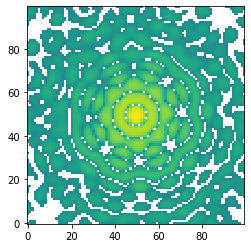

In [21]:
with h5py.File(out_fn,'r') as fh:
    tmp_diffr = fh['diffr'][0]
    plt.imshow(tmp_diffr,norm=colors.LogNorm(vmin=tmp_diffr.min()+0.0001, vmax=tmp_diffr.max()),origin='lower')
    print (tmp_diffr.mean(),tmp_diffr.max(),tmp_diffr.min())